In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("enriched_data.csv")
df['Weeks'] = df['T']
df.head()

,Y,T,D,P,Weeks
0,12.91645,1,0,0,1
1,13.03090,2,0,0,2
2,13.05717,3,0,0,3
3,13.16564,4,0,0,4
4,13.19299,5,0,0,5


In [4]:
model = smf.ols(formula='Y ~ T + D + P', data=df)

In [5]:
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     29.18
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           1.52e-10
Time:                        09:46:21   Log-Likelihood:                 4.8860
No. Observations:                  48   AIC:                            -1.772
Df Residuals:                      44   BIC:                             5.713
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9100      0.096    134.225      0.0

In [6]:
print(res.params)

Intercept    12.910017
T             0.012923
D            -0.520244
P            -0.029658
dtype: float64


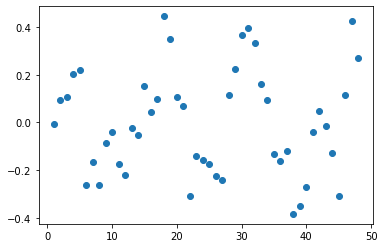

In [7]:
plt.scatter(df["T"], df.Y - res.fittedvalues)

In [8]:
res_df = pd.DataFrame({"Weeks": df["T"], "residuals": df.Y - res.fittedvalues})
res_df

,Weeks,residuals
0,1,-0.006490
1,2,0.095037
2,3,0.108383
3,4,0.203930
4,5,0.218357
5,6,-0.260466
6,7,-0.164349
7,8,-0.262602
8,9,-0.084596
9,10,-0.038389


## Residuals plot

<AxesSubplot:ylabel='Density'>

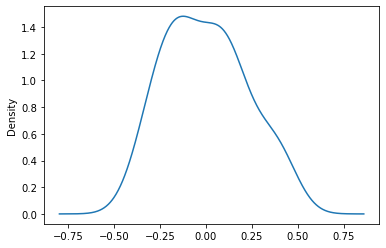

In [9]:
res.resid.plot(kind="kde")

In [10]:
import altair as alt

res_actual_pred = pd.DataFrame({"Actual": df["Y"], "Predicted": res.fittedvalues})

alt.Chart(res_actual_pred).mark_point().encode(
    x=alt.X('Actual', scale=alt.Scale(domain=(12, 13.6))),
    y=alt.Y('Predicted', scale=alt.Scale(domain=(12, 13.6)))
)

alt.Chart(...)

In [17]:
import altair as alt

rules = alt.Chart(pd.DataFrame({
  'residuals': [0.0],
  'color': ['black']
})).mark_rule().encode(
  y='residuals',
  color=alt.Color('color:N', scale=None)
)

residual_plot = alt.Chart(res_df).mark_point().encode(
    x=alt.X('Weeks'),
    y=alt.Y('residuals')
)

rules + residual_plot 

alt.LayerChart(...)

In [12]:
0.5202/12.91

0.04029434546862897

## Data plot

In [13]:
import altair as alt

intervention = rules = alt.Chart(pd.DataFrame({
  'Weeks': [24.5],
  'color': ['red']
})).mark_rule().encode(
  x='Weeks',
  color=alt.Color('color:N', scale=None)
)

dataplot = alt.Chart(df).mark_point().encode(
    x='Weeks',
    y=alt.Y('Y', scale=alt.Scale(domain=(5, 15)), axis=alt.Axis(title='bounce rate (%)'))
)

intervention + dataplot

alt.LayerChart(...)

In [118]:
start = 24
end = 48
cf_model = smf.ols(formula='Y ~ T ', data=df[:start])
cf_res = cf_model.fit()
print(cf_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     4.832
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0387
Time:                        02:48:54   Log-Likelihood:                 5.6931
No. Observations:                  24   AIC:                            -7.386
Df Residuals:                      22   BIC:                            -5.030
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9100      0.084    153.690      0.0

## Plot with counterfactual

In [124]:
start = 24
end = 48
beta = res.params

predictions = res.get_prediction(df)
summary = predictions.summary_frame(alpha=0.05)

y_trend = predictions.predicted_mean[:start]
ci_lower = summary["obs_ci_lower"]
ci_upper = summary["obs_ci_upper"]
cf = cf_res.get_prediction(exog=df["T"][start:]).summary_frame(alpha=0.05)
y_new_trend = predictions.predicted_mean[start:]

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   13.233096  0.084000      13.058890      13.407302     12.784447   
1   13.246020  0.089189      13.061054      13.430986     12.793084   
2   13.258943  0.094458      13.063049      13.454837     12.801436   
3   13.271866  0.099795      13.064903      13.478829     12.809511   
4   13.284789  0.105191      13.066637      13.502941     12.817319   
5   13.297712  0.110635      13.068269      13.527155     12.824867   
6   13.310635  0.116122      13.069814      13.551457     12.832166   
7   13.323559  0.121645      13.071282      13.575835     12.839222   
8   13.336482  0.127200      13.072684      13.600279     12.846046   
9   13.349405  0.132784      13.074029      13.624781     12.852645   
10  13.362328  0.138391      13.075322      13.649334     12.859028   
11  13.375251  0.144021      13.076571      13.673932     12.865204   
12  13.388174  0.149669      13.077780      13.698569     12.871180   
13  13

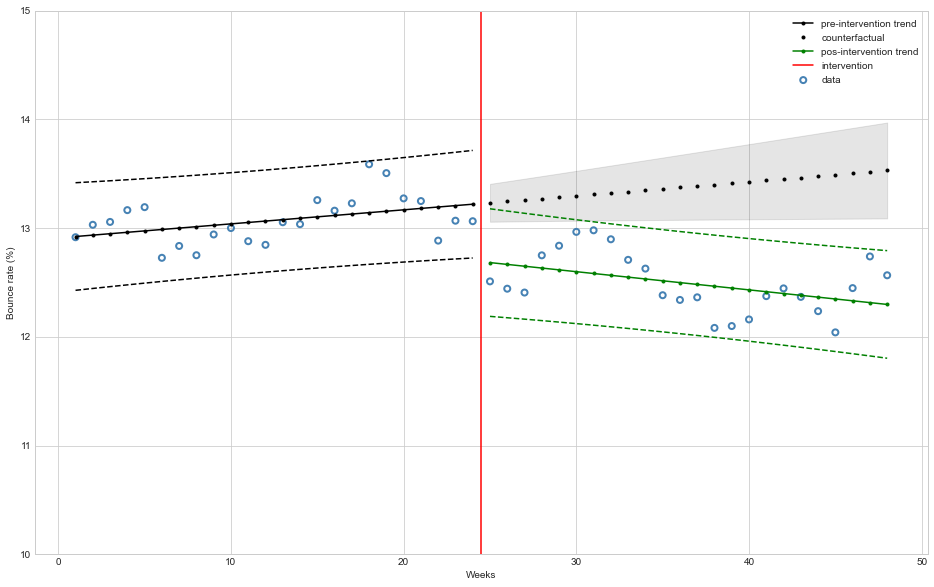

In [126]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(df["T"], df["Y"], facecolors='none', edgecolors='steelblue', label="data", linewidths=2)
ax.plot(df["T"][:start], ci_upper[:start], 'k--')
ax.plot(df["T"][:start], y_trend[:start], 'k.-', label="pre-intervention trend")
ax.plot(df["T"][:start], ci_lower[:start], 'k--')
ax.plot(df["T"][start:], cf['mean'], 'k.', label="counterfactual")
ax.fill_between(df["T"][start:], cf['mean_ci_lower'], cf['mean_ci_upper'], color='k', alpha=0.1);
ax.plot(df["T"][start:], ci_upper[start:], 'g--')
ax.plot(df["T"][start:], y_new_trend, 'g.-', label="pos-intervention trend")
ax.plot(df["T"][start:], ci_lower[start:], 'g--')
ax.axvline(x = 24.5, color = 'r', label = 'intervention')
ax.legend(loc='best')
plt.ylim([10, 15])
plt.xlabel("Weeks")
plt.ylabel("Bounce rate (%)");

/mnt/home/regis/anaconda3/envs/kaggle_env/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


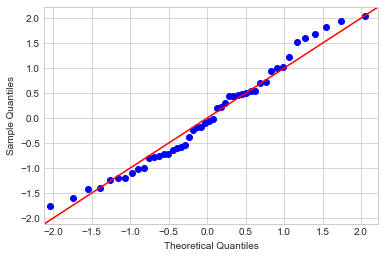

In [16]:
import scipy as sp
from statsmodels.graphics.gofplots import qqplot
fig = sm.qqplot(res.resid, sp.stats.t, fit=True, line="45")
plt.show();

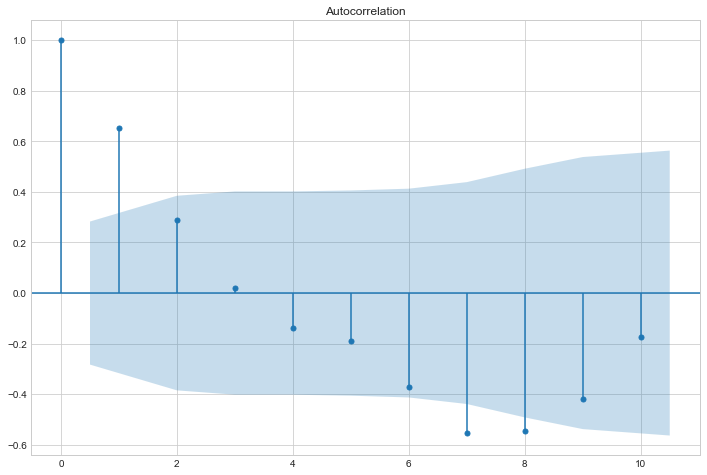

In [29]:
# autocorrelation
_, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(res.resid, lags=10, ax=ax)
plt.show()

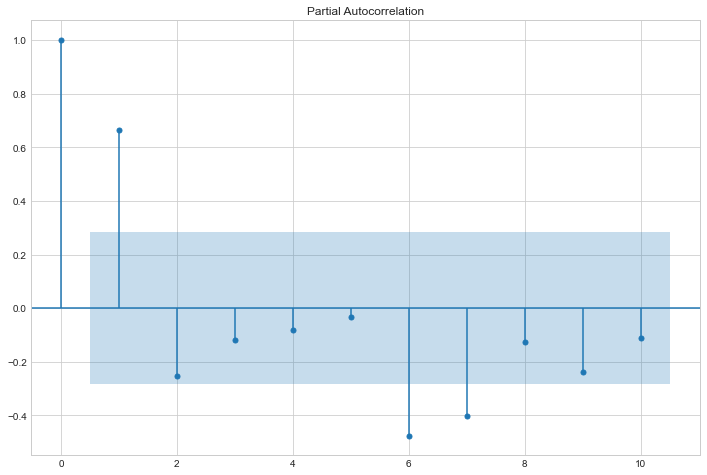

In [30]:
# partial autocorrelation
_, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_pacf(res.resid, lags=10, ax=ax)
plt.show()

In [56]:
from statsmodels.tsa.arima.model import ARIMA
X = df[["T","D","P"]].to_numpy()
arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(1,0,0)).fit()
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  18.574
Date:                Thu, 30 Dec 2021   AIC                            -25.148
Time:                        01:51:46   BIC                            -13.921
Sample:                             0   HQIC                           -20.905
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9172      0.279     46.245      0.000      12.370      13.465
T              0.0121      0.016      0.767      0.443      -0.019       0.043
D             -0.5510      0.273     -2.018      0.0

In [59]:
# from statsmodels.tsa.arima.model import ARIMA
# X = df[["T","D","P"]].to_numpy()
# arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(0,0,0)).fit()
# print(arima_results.summary())

In [91]:
df[["Y", "Y-1"]]

,Y,Y-1
0,12.91645,NaN
1,13.03090,12.91645
2,13.05717,13.03090
3,13.16564,13.05717
4,13.19299,13.16564
5,12.72709,13.19299
6,12.83613,12.72709
7,12.75080,12.83613
8,12.94173,12.75080
9,13.00086,12.94173


## Plot with counterfactual

In [110]:
start = 24
end = 48

predictions = arima_results.get_prediction(0, end-1)
summary = predictions.summary_frame(alpha=0.05)

arima_cf = ARIMA(df["Y"][:start], df["T"][:start], order=(1,0,0)).fit()

y_trend = predictions.predicted_mean[:start]
ci_lower = summary["mean_ci_lower"]
ci_upper = summary["mean_ci_upper"]


y_cf = arima_cf.get_forecast(24, exog=df["T"][start:]).summary_frame(alpha=0.05)

y_new_trend = predictions.predicted_mean[start:]

Y        mean   mean_se  mean_ci_lower  mean_ci_upper
24  13.136139  0.159650      12.823230      13.449048
25  13.180122  0.181048      12.825275      13.534970
26  13.208924  0.186718      12.842964      13.574884
27  13.229607  0.188308      12.860530      13.598684
28  13.245948  0.188760      12.875984      13.615912
29  13.259967  0.188890      12.889750      13.630184
30  13.272744  0.188927      12.902454      13.643033
31  13.284856  0.188937      12.914546      13.655166
32  13.296613  0.188940      12.926297      13.666929
33  13.308181  0.188941      12.937863      13.678498
34  13.319647  0.188941      12.949328      13.689965
35  13.331058  0.188941      12.960740      13.701376
36  13.342440  0.188941      12.972122      13.712759
37  13.353807  0.188941      12.983489      13.724125
38  13.365166  0.188941      12.994847      13.735484
39  13.376520  0.188941      13.006201      13.746838
40  13.387871  0.188941      13.017553      13.758190
41  13.399222  0.188941     

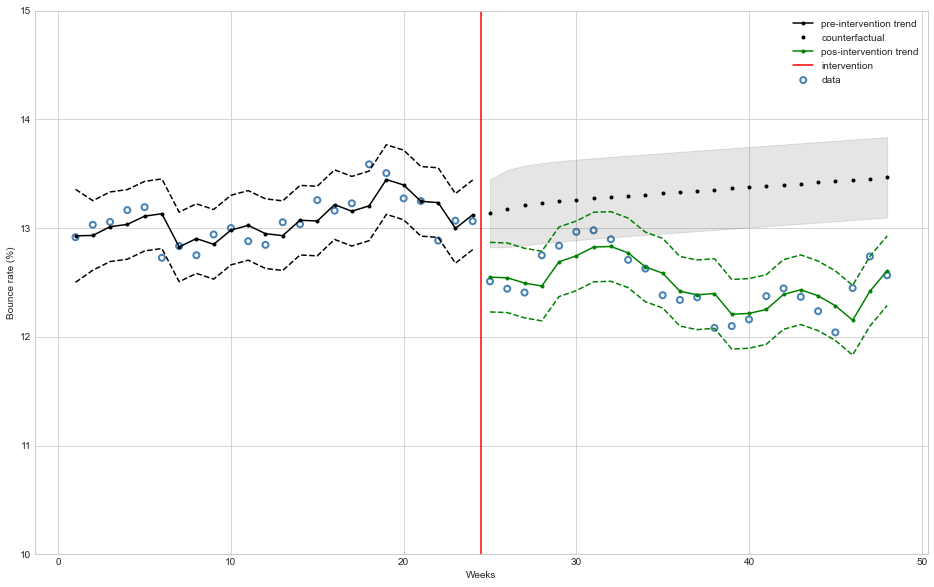

In [112]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(df["T"], df["Y"], facecolors='none', edgecolors='steelblue', label="data", linewidths=2)
ax.plot(df["T"][:start], ci_upper[:start], 'k--')
ax.plot(df["T"][:start], y_trend[:start], 'k.-', label="pre-intervention trend")
ax.plot(df["T"][:start], ci_lower[:start], 'k--')
ax.plot(df["T"][start:], y_cf["mean"], 'k.', label="counterfactual")
ax.fill_between(df["T"][start:], y_cf['mean_ci_lower'], y_cf['mean_ci_upper'], color='k', alpha=0.1);
ax.plot(df["T"][start:], ci_upper[start:], 'g--')
ax.plot(df["T"][start:], y_new_trend, 'g.-', label="pos-intervention trend")
ax.plot(df["T"][start:], ci_lower[start:], 'g--')
ax.axvline(x = 24.5, color = 'r', label = 'intervention')
ax.legend(loc='best')
plt.ylim([10, 15])
plt.xlabel("Weeks")
plt.ylabel("Bounce rate (%)");